In [12]:
#! /usr/bin/python3

import sys
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot

In [13]:
DATA_PATH = "/home/mathuis/Development/cyber_wolf/data"
# MODEL_NAME = "1h-4n-e20-b64-class-model.h5"
MODEL_NAME = "best-class-model.h5"
HL_SIZE = 4

In [14]:
def load_data(path: str):
    print("Loading data")
    return np.load(path, allow_pickle=True)


def build_model():
    print("Building model")
    
    input_layer = layers.Input(shape=(48,))
    encoded = layers.Dense(HL_SIZE, activation="relu")(input_layer)
    decoded = layers.Dense(48, activation="relu")(encoded)

    model = keras.Model(input_layer, decoded)    

    return model

def train_model(model, x_train, x_test):
    print("Compiling model")
    model.compile(optimizer="adam", loss="mse", metrics=["mse", "msle", "mae", "mape", "cosine_similarity"])
    print("Training model")
    return model.fit(x_train, x_train, epochs=20, batch_size=64, validation_data=(x_test, x_test))

def plot(history):
    print(history.keys())

    for key in history.keys():
        if not key.startswith("val_"):
            pyplot.plot()

            pyplot.title(key)
            pyplot.plot(history[key], label="train")
            pyplot.plot(history[f"val_{key}"], label="test")
            pyplot.xlabel("Epoch")
            pyplot.ylabel(key)
            pyplot.legend()

            pyplot.show()

Loading data
Loading data
Building model
Compiling model
Training model
Epoch 1/20
45/45 [==============================] - 1s 8ms/step - loss: 4.2682 - mse: 4.2682 - msle: 0.2377 - mae: 0.4948 - mape: 134106328.6957 - cosine_similarity: 0.0880 - val_loss: 3.6245 - val_mse: 3.6245 - val_msle: 0.1766 - val_mae: 0.4234 - val_mape: 80388456.0000 - val_cosine_similarity: 0.2820
Epoch 2/20
45/45 [==============================] - 0s 3ms/step - loss: 3.7320 - mse: 3.7320 - msle: 0.1629 - mae: 0.4193 - mape: 77963700.8696 - cosine_similarity: 0.3624 - val_loss: 3.0383 - val_mse: 3.0383 - val_msle: 0.1258 - val_mae: 0.3828 - val_mape: 68416960.0000 - val_cosine_similarity: 0.5445
Epoch 3/20
45/45 [==============================] - 0s 3ms/step - loss: 3.0318 - mse: 3.0318 - msle: 0.1167 - mae: 0.3767 - mape: 65034170.3478 - cosine_similarity: 0.5900 - val_loss: 2.3276 - val_mse: 2.3276 - val_msle: 0.0876 - val_mae: 0.3289 - val_mape: 51073088.0000 - val_cosine_similarity: 0.6750
Epoch 4/20
45/4

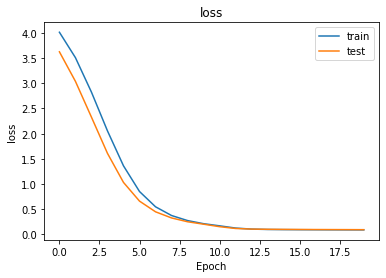

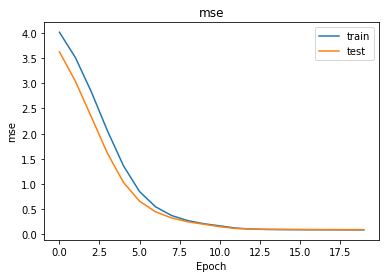

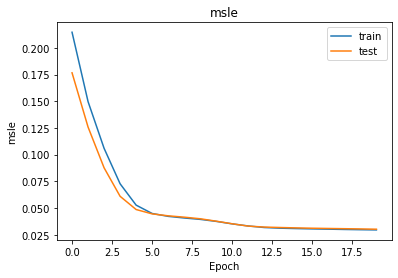

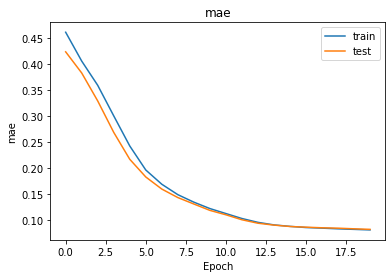

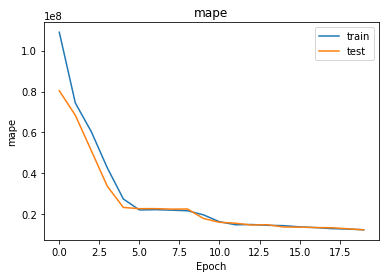

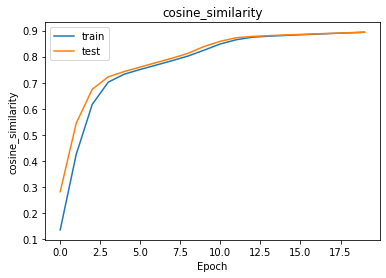

In [15]:
x_train = load_data(f"{DATA_PATH}/datasets/class_x_train.npy")
x_test = load_data(f"{DATA_PATH}/datasets/class_x_test.npy")

model = build_model()
res = train_model(model, x_train, x_test)
plot(res.history)

In [16]:
# model.save(f"{DATA_PATH}/models/{MODEL_NAME}")